In [1]:
!pip install fastai
!pip install fastai2
!pip install fastcore
!pip install -Uqq fastbook
import fastbook
from fastbook import *
fastbook.setup_book()
from fastai.vision.widgets import *

import warnings
warnings.filterwarnings("ignore")

import json
import os
from pprint import pprint
import requests
import matplotlib.pyplot as plt
import PIL.Image
from io import BytesIO

from IPython.display import Image
from IPython.core.display import HTML

#pull bing key:
with open("./bing_config_secret.json") as key_file:
    key = json.load(key_file)

sub_key = key['api_key']
assert sub_key


/Users/yuvalgilad/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/fastbook/__init__.py:19: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


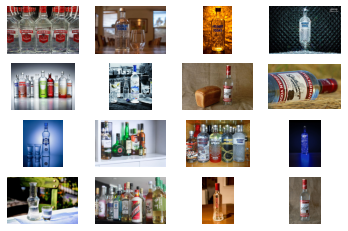

In [2]:
search_url = "https://api.bing.microsoft.com/v7.0/images/search"
query = "Vodka"

#construct request
params = {'q': query, "license": "public", "imageType": "photo", "count": "150"}
headers = {'Ocp-Apim-Subscription-Key': sub_key}

try:
    response = requests.get(search_url, headers=headers, params=params)
    response.raise_for_status()
    
    #return json file
    search_results = response.json()
    
    #create set of thumbnails for visualization to make sure we're collecting the right data
    thumbnail_urls = [img["thumbnailUrl"] for img in search_results["value"][:16]]
    f, axes = plt.subplots(4, 4)
    for i in range(4):
        for j in range(4):
            img_data = requests.get(thumbnail_urls[i+4*j])
            img_data.raise_for_status()
            image = PIL.Image.open(BytesIO(img_data.content))
            axes[i][j].imshow(image)
            axes[i][j].axis("off")
    plt.show()
    
except Exception as ex:
    raise ex

In [3]:
img_urls = [img['contentUrl'] for img in search_results["value"]]
len(img_urls)

150

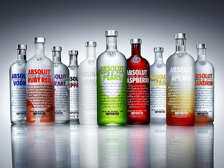

In [4]:
#dest = './bing-imgs/vodka_test.jpg'
#download_url(img_urls[1], dest)

#img = PIL.Image.open(dest)
#img.to_thumb(224,224)

In [10]:
alc_list = ['vodka','whiskey','tequila']
path = Path('alcohol')

In [11]:
if not path.exists():
    path.mkdir()
    for alc_type in alc_list:
        dest = (path/alc_type)
        dest.mkdir(exist_ok=True)
        
        query = alc_type
        params = {'q': query, "license": "public", "imageType": "photo", "count": "150"}
        response = requests.get(search_url, headers=headers, params=params)
        response.raise_for_status()
        search_results = response.json()
        img_urls = [img['contentUrl'] for img in search_results["value"]]
        
        download_images(dest, urls=img_urls)

In [12]:
# confirm photos downloaded
img_files = get_image_files(path)
#img_files

(#342) [Path('alcohol/whiskey/00000148.jpeg'),Path('alcohol/whiskey/00000010.jpg'),Path('alcohol/whiskey/00000005.jpg'),Path('alcohol/whiskey/00000011.jpg'),Path('alcohol/whiskey/00000056.jpeg'),Path('alcohol/whiskey/00000007.jpg'),Path('alcohol/whiskey/00000013.jpg'),Path('alcohol/whiskey/00000012.jpg'),Path('alcohol/whiskey/00000006.jpg'),Path('alcohol/whiskey/00000016.jpg')...]

In [13]:
# check for corrupt images
failed = verify_images(img_files)
#failed


(#2) [Path('alcohol/whiskey/00000058.jpg'),Path('alcohol/whiskey/00000033.jpeg')]

In [14]:
# remove corrupt files from dataset
failed.map(Path.unlink)

(#2) [None,None]